<a href="https://colab.research.google.com/github/edcalderin/DeepLearning_SaturdaysAI/blob/master/Tarea_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea: Computer Vision
### Grupo: Computer Vision
Integrantes:
<br>
* Erick Calderin
* Bladimir Calcina
* Integrante 3
* Integrante 4
<br>

Indicaciones:
<rb>
* Debe realizar la siguiente tarea hasta el miercoles 23 de junio, 23:59 UTC - 4
* Debe hacer una copia de este notebook para poder editar el código.
* Una vez finalizado el trabajo debe subir el link de su notebook (con permisos de lector) en la sección de "Tareas" del Módulo 4: Computer Vision.

#Tarea módulo Computer Vision

La tarea correspondiente al módulo de Computer Vision se dividirá en dos partes: La primera consiste en recrear el funcionamiento de [PixyCam](https://pixycam.com/); la segunda parte se enfocará en la integración de métodos de Computer Vision.

# Parte I: Detector por Color
##Contexto

[PixyCam](https://pixycam.com/) es aplicación muy interesante de algoritmos de Procesamiento de Imágenes desarrollada por [CREATE Lab](https://www.cmucreatelab.org/). Básicamente, es una cámara con una unidad de procesamiento que es capaz de reconocer objetos que son aprendidos tan solo apretando un botón, todo esto a una alta velocidad (60 fps).

[![PixyCam](https://img.youtube.com/vi/EcCbEWiyiQY/0.jpg)](https://www.youtube.com/watch?v=EcCbEWiyiQY "PixyCam")

Ahora que ya sabemos sobre procesamiento de imágenes y visión computacional surgen varias dudas: ¿cómo logra hacer esto? ¿Realmente es capaz de "aprender" a reconocer nuevos objetos en pocos segundos sin más interacción que presionar un botón?

Básicamente, PixyCam es capaz de reconocer objetos por su color, es decir, si un objeto es verde, reconocerá todos los objetos que tengan dicho color. Además de esto, es capaz de reconocer ciertos patrones de color, por ejemplo, que la mitad superior de un cuadrado sea roja y la mitad inferior del mismo cuadrado sea amarilla, lo que mejora bastante su funcionalidad.

Para que la detección de cada color sea precisa y robusta a cambios de iluminación se usa un espacio de color distinto al clásico RGB, adivinen cuál es... sí! El espacio de color HSV.

## Implementación

Después de toda esta introducción podemos meter las manos en la masa y desarrollar nuestro propio detector por color usando la librería [OpenCV](https://opencv.org/).

Lo primero que haremos será importar OpenCV y definir una función que permite cargar imágenes desde una *url*.

In [8]:
%matplotlib inline
# Importar librerías necesarias
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import cv2 #OpenCV
from ipywidgets import interact, widgets

# Función para cargar imagen desde una url
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

# Función lambda para crear los sliders
range_sldr = lambda desc: widgets.FloatRangeSlider(
  value=[0, 255],
  min=0., max=255., step=1,
  description= desc + ':',
  readout_format='d',
  continuous_update=False
)

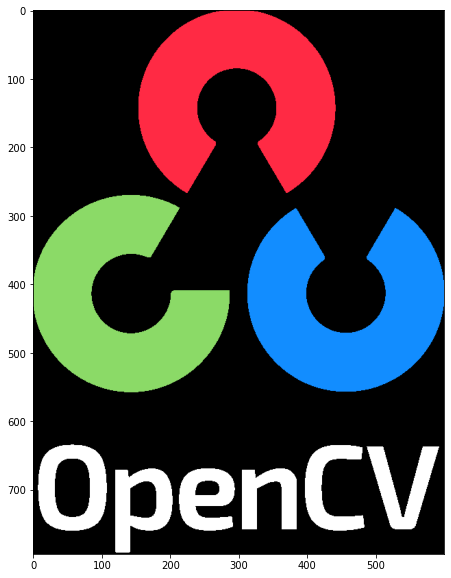

In [9]:
# Probamos la función
img = url_to_image('https://opencv.org/wp-content/uploads/2020/07/cropped-OpenCV_logo_white_600x.png')

# Mostramos la imagen usando matplotlib, recordemos que OpenCV trabaja con el 
# espacio de color BGR, por lo que hay que cambiarlo a RGB
fig = plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

A continuación veremos cómo filtrar los pixeles en base a sus valores. Primero lo haremos utilizando el espacio de color BGR. Como pueden observar, existen tres sliders que permiten ajustar los valores que limitan el filtrado: uno para el canal B, otro para el canal G y el último para el canal R.

En este caso, es basante sencillo filtrar los colores de la imagen, dado que son "independientes" entre sí, es decir, dependen de un canal cada uno (esto no es tan así, ya que tienen componentes en los 3 canalaes). De todas formas, vemos que para separarlos tenemos que mover los tres sliders.

In [10]:
# Callback para sliders
def f(B, G, R):
  # Se definen rangos capturando los datos de los sliders
  lower_range = np.array([B[0], G[0], R[0]])
  upper_range = np.array([B[1], G[1], R[1]])
  # Filtramos por rango
  mask = cv2.inRange(img, lower_range, upper_range)
  # "Enmascaramos" la imagen
  img_out = cv2.bitwise_and(img, img, mask=mask)
  fig = plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))

names = ['B', 'G', 'R']

interact(f, **{s[0] : range_sldr(*s[0]) for s in names})

interactive(children=(FloatRangeSlider(value=(0.0, 255.0), continuous_update=False, description='B:', max=255.…

<function __main__.f>

Ahora intentaremos hacer el filtrado utilizando el espacio de color HSV. Como vimos en la clase, este espacio de color posee un canal que maneja la gama de colores (canal H o matiz). Para cambiar una imagen de un espacio de color a otro se debe utilizar la función

* [`cv2.cvtColor(img, cv2.COLOR_BGR2HSV)`](https://docs.opencv.org/4.5.2/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)

En este caso, podemos notar que para filtrar los tres colores solo se necesita ajustar el rango en en canal H.

In [11]:
# Pasamos la imagen de BGR a HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Callback para sliders
def f(H, S, V):
  # Se definen rangos capturando los datos de los sliders
  lower_range = np.array([H[0], S[0], V[0]])
  upper_range = np.array([H[1], S[1], V[1]])
  # Filtramos por rango
  mask = cv2.inRange(img_hsv, lower_range, upper_range)
  # "Enmascaramos" la imagen
  img_out = cv2.bitwise_and(img, img, mask=mask)
  fig = plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))

names = ['H', 'S', 'V']

interact(f, **{s[0] : range_sldr(*s[0]) for s in names})

interactive(children=(FloatRangeSlider(value=(0.0, 255.0), continuous_update=False, description='H:', max=255.…

<function __main__.f>

## Encontrar rangos óptimos

Para resolver el problema, deberán encontrar el rango óptimo para filtrar cada una de las esferas que se muestran en la siguiente imagen. Además, deben analizar las siguientes funciones:

* [`cv2.inRange(img, lower, upper)`](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga48af0ab51e36436c5d04340e036ce981)
* [`cv2.bitwise_and(img, img, mask=mask)`](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)




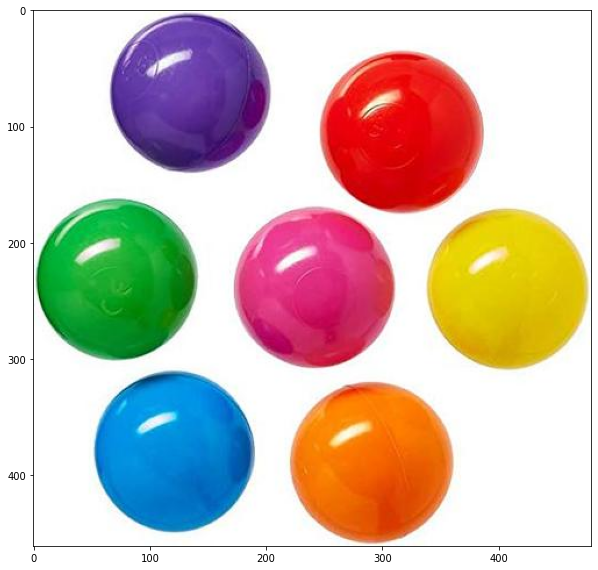

In [12]:
img_balls = url_to_image('https://cdn.shopify.com/s/files/1/1463/4916/products/41Qk3dhajjL_480x480.jpg?v=1594985149')

fig = plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_balls, cv2.COLOR_BGR2RGB))

In [13]:
img_hsv = cv2.cvtColor(img_balls, cv2.COLOR_BGR2HSV)
def f(H, S, V):
  lower_range = np.array([H[0], S[0], V[0]])
  upper_range = np.array([H[1], S[1], V[1]])
  mask = cv2.inRange(img_hsv, lower_range, upper_range)
  masked_img = cv2.bitwise_and(img_balls, img_balls, mask=mask)
  fig = plt.figure(figsize=(10,10))
  plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

names = ['H', 'S', 'V']

interact(f, **{s[0] : range_sldr(*s[0]) for s in names})

interactive(children=(FloatRangeSlider(value=(0.0, 255.0), continuous_update=False, description='H:', max=255.…

<function __main__.f>

## Función que hará el procesamiento

La siguiente función es la que deben editar para poder realizar el procesamineto deseado. Además, les recomiendo revisar la documentación de todas las funciones utilizadas, la que pueden encontrar en [`docs.opencv.org`](https://docs.opencv.org).

In [14]:
# Función que encontrará cada color
def procesar_img(img_, ranges):
  # Copiamos imagen para mantener la original
  img = img_.copy()
  
  # Cambiar espacio de color
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  
  # Iteramos por todos los rangos definidos
  for name, (lower, upper) in ranges.items():
    # Filtrar rango util
    mask = cv2.inRange(img_hsv, lower, upper)
    
    ### (OPC) Aplicar transformaciones morfologicas, buscar en docs.opencv.org
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.erode(mask, kernel, iterations = 1)
    mask = cv2.dilate(mask, kernel, iterations = 1)

    # Definir blobs
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, 
                                           cv2.CHAIN_APPROX_SIMPLE)
    
    # Iteramos por cada blob
    for cnt in contours:
      # Obtener rectangulo que bordea un contorno
      x,y,w,h = cv2.boundingRect(cnt)

      # Filtramos blobs muy pequeños
      if cv2.contourArea(cnt) < 1000:
        continue

      #Dibujar rectangulo en el frame original
      cv2.rectangle(img, (x, y), (x+w, y+h), (250,0,0), 2)

      # Escribimos la etiqueta
      cv2.putText(img, name, (x+5,y+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0))

  # Retornar imagen con sus respectivos rectángulos y etiquetas
  return img

En la siguiente celda correrán el sistema, dejé como ejemplo el rango para el color azul, ustedes deben definir todos los demás.

Aqui, el siguiente post de Stackoverflow nos sirvió mucho para calcular los rangos de cada color: https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv

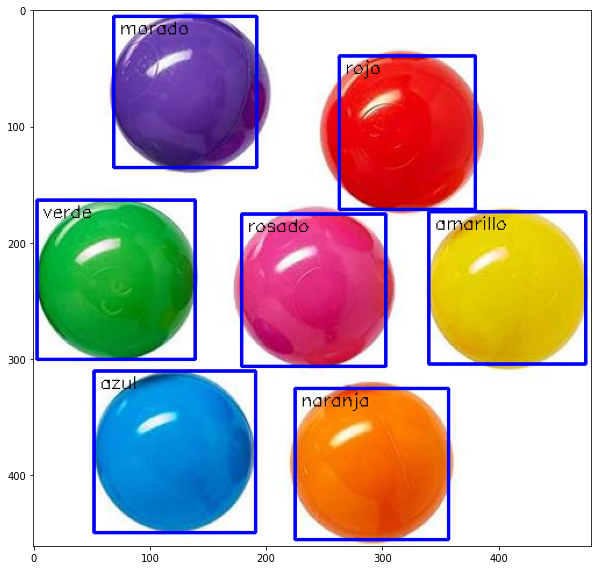

In [15]:
# Creamos el diccionario de rangos para filtrar cada color
ranges = dict()

# Definimos los rangos para cada color, dejo como ejemplo el azul
blue_low = np.array([90, 50, 50])
blue_up = np.array([120, 255, 255])

green_low = np.array([40, 120, 50])
green_up = np.array([75, 255, 255])

purple_low = np.array([130, 150, 10])
purple_up = np.array([140, 255, 255])

orange_low = np.array([10, 200, 10])
orange_up = np.array([20, 280, 255])

red_low = np.array([0, 200, 10])
red_up = np.array([9, 280, 255])

yellow_low = np.array([25, 150, 10])
yellow_up = np.array([35, 290, 255])

pink_low = np.array([160, 180, 10])
pink_up = np.array([175, 290, 255])

# Agregamos al diccionario de rangos con su respectivo nombre como key
ranges['azul'] = (blue_low, blue_up)
ranges['verde'] = (green_low, green_up)
ranges['morado'] = (purple_low, purple_up)
ranges['naranja'] = (orange_low, orange_up)
ranges['rojo'] = (red_low, red_up)
ranges['amarillo'] = (yellow_low, yellow_up)
ranges['rosado'] = (pink_low, pink_up)

# Detectamos los colores definidos en la imagen
result = procesar_img(img_balls, ranges)

# Mostramos los resultados
fig = plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

## Resultado esperado

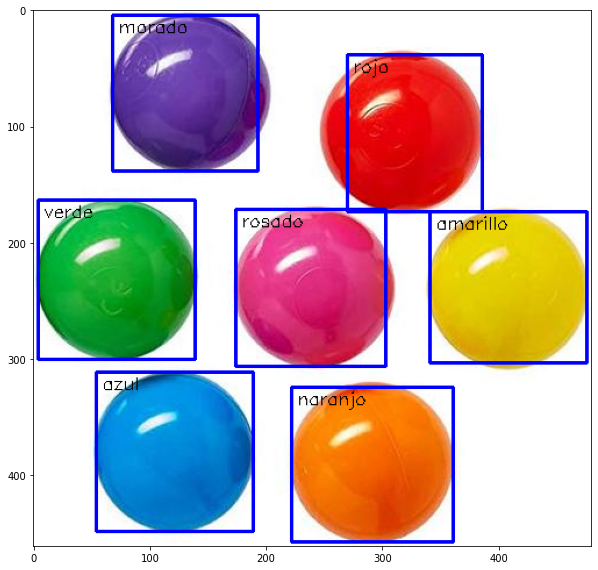

¡Felicitaciones! Lograste desarrollar gran parte del algoritmo que utiliza PixyCam.

# Parte II: Integración de métodos de Computer Vision

Como ya hemos conversado, el desarrollo de esta área se destaca por ser publicada de forma abierta para su uso mediante licencias del tipo MIT, BSD-3, entre otras, las que permiten incluso su uso comercial. Además, las librerías de Deep Learning como TensorFlow y PyTorch también disponibilizan distintos modelos que pueden ser utilizados a un alto nivel (sin necesidad de conocer su código de fuente).

Bajo esto último, hay que destacar [PyTorch Hub](https://pytorch.org/hub/), el cual es muy fácil de utilizar y mostraremos en esta sección.

## YOLOv5 y Deeplabv3

Lo que haremos será cargar desde PyTorch Hub tanto [YOLOv5](https://pytorch.org/hub/ultralytics_yolov5/) para realizar la detección de objetos y como [Deeplabv3](https://pytorch.org/hub/pytorch_vision_deeplabv3_resnet101/) para realizar la segmentación semántica de las imágenes. Básicamente, la idea es notar que en pocas líneas de código se pueden realizar cosas bastante interesantes.

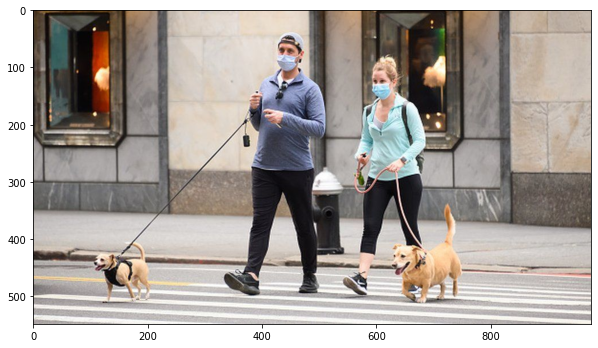

In [16]:
# Esta será la imagen que utilizaremos
img = url_to_image('https://ichef.bbci.co.uk/news/976/cpsprodpb/11F30/production/_117802537_gettyimages-1276898205-594x594.jpg')

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## YOLOv5

Siguiendo la documentación, primero debemos instalar algunos requerimientos y cargaremos las librerías necesarias

In [17]:
# Instalamos lo necesario
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from skimage import color

Luego cargamos el modelo

In [18]:
# Model
model_yolov5 = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Dejamos en modo "eval" para evitar procesamientos innecesarios (por ej, Dropout)
model_yolov5.eval()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2021-6-21 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)



AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

Y hacemos la inferencia

In [19]:
# Inference
with torch.no_grad():
  results = model_yolov5(img.copy())

# Results
results.print()

image 1/1: 549x976 2 persons, 1 fire hydrant, 2 dogs
Speed: 12.4ms pre-process, 31.2ms inference, 76.0ms NMS per image at shape (1, 3, 384, 640)


Dibujamos las detecciones y mostramos los resultados usando matplotlib

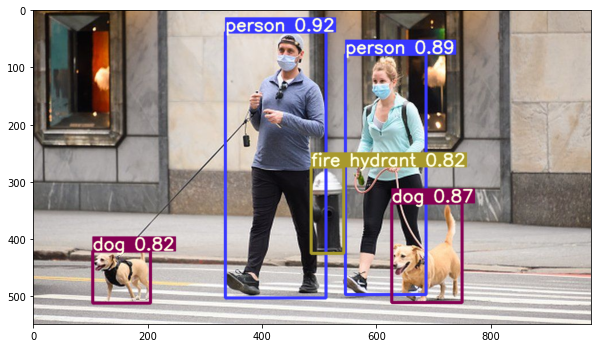

In [20]:
# Dibujamos las detecciones en la imagen
output = results.render()[0] # El tamaño de batch es 1, por eso usamos [0]

# Mostramos los resultados
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

¡Así de fácil fue ejecutar YOLOv5!

## Deeplabv3

Ahora utilizaremos el método Deeplabv3 que genera una segmentación semántica en las imágenes. Para esto, seguiremos un procedimiento casi idéntico a lo anterior. Deben completar un solo paso (cargar el modelo).

Antes de eso, se definen algunas funciones auxiliares: una preparar las imágenes que entrarán a la red (básicamente normalizar y darle el formato necesario) y otra para mostrar los resultados de la segmentación semántica.

In [22]:
# Se necesita preprocesar la imagen, esta es la función que lo hace
def preprocess(input_image):
  input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
  input_image = Image.fromarray(input_image)
  t = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])
  input_tensor = t(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
  input_batch = input_batch.to('cuda')

  return input_batch

# Función que muestra los resultados
def show_segmentation(output_predictions, input_image):
  # create a color pallette, selecting a color for each class
  palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
  colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
  colors = (colors % 255).numpy().astype("uint8")

  # plot the semantic segmentation predictions of 21 classes in each color
  r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.shape[:2][::-1])
  r.putpalette(colors)
  
  plt.figure(figsize=(10,10))
  plt.imshow(color.label2rgb(np.array(r, dtype=np.uint8),input_image))

Ahora deben cargar el modelo Deeplabv3, usen la documentación.

In [26]:
# Ahora deben cargar el modelo deeplabv3, usen la documentación!
model = torch.hub.load('pytorch/vision', 'deeplabv3_resnet101', pretrained=True)

# Lo pasamos a CUDA (es necesario activar la aceleración por GPU)
model.cuda()
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

Preparamos la imagen de entrada y ejecutamos la inferencia

In [27]:
input_batch = preprocess(img)

# Ejecutamos la inferencia
with torch.no_grad():
  output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

Mostramos los resultados usando la función definida anteriormente.

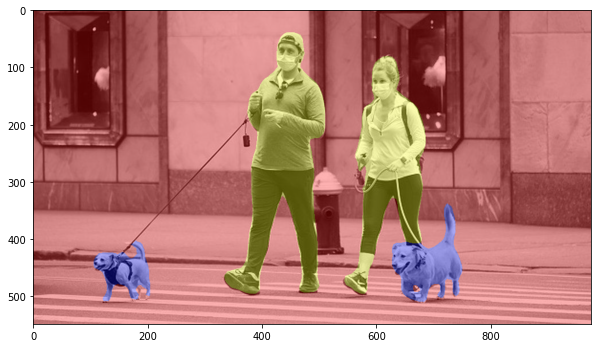

In [28]:
# Mostramos los resultados
show_segmentation(output_predictions, img)

Como pueden notar, utilizar PyTorch Hub facilita mucho el desarrollo y con unos pequeños cambios pudimos resolver dos problemas muy distintos entre sí: la detección de objetos y la segmentación semántica.